### 좌표계(Coordinate reference systems)
---
__좌표계(CRS)__는 지구라는 곡면을 2차원 데이터(평면)로 표현하는 방법론을 의미한다 . Geopandas 데이터라면 , __crs__ 속성값으로 확인할 수 있다. 좌표계가 다른 데이터의 경우, 좌표간의 거리나 위치 등이 다르게 표현되기 때문에 반드시 통일시켜주어야 한다. 자주 사용되는 좌표계는 다음과 같다.
- WGS84(EPSG:4326) : GPS가 사용하는 좌표계(경도와 위도)
- Bessel 1841(EPSG:4004) : 한국과 일본에 잘 맞는 지역타원체를 사용한 좌표계
- GRS80 UTM-K(EPSG:5179) : 한반도 전체를 하나의 좌표계로 나타낼 때 많이 사용하는 좌표계, __네이버지도__에서 사용
- GRS80 중부원점(EPSG:5181) : 과거 지리원 좌표계에서 타원체 문제를 수정한 좌표계, __다음카카오 지도__에서 사용
- Web mercator projection(Psedo-Mercator, EPSG:3857) : 구글지도/빙지도/야후지도/OSM 등에서 사용중인 좌표계
- Albers projection(EPSG:9822) : 미국 지질 조사국에서 사용

GeoPandas는 좌표계 변환 기능을 __to_crs()__라는 함수로 제공한다. 다음 코드는 "epsg:4326" 에서 "epsg:3857"로 변환한다. 다음 코드의 시각화된 결과를 보면, 남극이 찢어져 있는 것을 볼 수 있다. "epsg:3857", Web mercator projection은 내부적으로 계산이 간단하고 빠르다는 장점이 있지만, 북위 85도, 남위 85도 이상의 지역, 즉 극지방에 대해서는 정보 왜곡이 심하다. 남극 부분이 왜곡된 것은 이 때문이다.

In [3]:
import geopandas as gpd

countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

##### 좌표계가 4326인것을 확인 가능

In [4]:
countries.crs

{'init': 'epsg:4326'}

In [8]:
print(countries.geometry[113])

POLYGON ((23.48412763844985 53.91249766704114, 23.527535841575 53.47012156840655, 23.80493493011778 53.08973135030607, 23.79919884613338 52.69109935160657, 23.19949384938619 52.48697744405367, 23.50800215016869 52.02364655212473, 23.52707075368437 51.57845408793031, 24.0299857927489 50.70540660257518, 23.92275719574326 50.42488108987874, 23.42650841644439 50.30850576435745, 22.5184501482116 49.47677358661974, 22.77641889821263 49.02739533140962, 22.55813764821175 49.08573802346714, 21.60780805836421 49.47010732685409, 20.88795535653841 49.32877228453583, 20.41583947111985 49.43145335549977, 19.82502282072687 49.21712535256923, 19.32071251799047 49.57157400165919, 18.90957482267632 49.43584585224458, 18.85314415861362 49.49622976337764, 18.39291385262217 49.98862864847075, 17.64944502123899 50.04903839781996, 17.55456709155112 50.36214590107642, 16.86876915860566 50.47397370055603, 16.71947594571444 50.21574656839354, 16.17625328946227 50.42260732685791, 16.23862674323857 50.69773265237

##### 이전의 좌표계와 다른것을 확인할 수 있다.

In [7]:
countries_mercator = countries.to_crs(epsg=3857)

print(countries_mercator.geometry[113])

POLYGON ((2614241.130436478 7153601.785967642, 2619073.309504623 7070435.576908913, 2649953.234787724 6999613.069934944, 2649314.696839431 6926062.815965137, 2582555.841975354 6888660.742470466, 2616898.828923959 6804402.184097363, 2619021.536157463 6724260.516108001, 2675005.782218406 6569348.070398897, 2663069.149401261 6520185.512981648, 2607826.987982928 6499876.023004116, 2506742.403952632 6356150.5315977, 2535459.353843323 6279511.087609828, 2511160.396243507 6289421.884152673, 2405370.190215897 6355008.512342297, 2325236.554002486 6330832.415777707, 2272680.854042278 6348389.632347571, 2206911.445368343 6311783.649685667, 2150771.879265925 6372407.960023718, 2105004.240377633 6349141.515028634, 2098722.407589047 6359484.52348315, 2047489.804278448 6444306.756093701, 1964727.232548202 6454772.762874234, 1954165.469727828 6509230.959613078, 1877822.793045259 6528767.982364263, 1861203.548607317 6483723.521564444, 1800732.279125955 6519788.224792923, 1807675.660239353 6567999.29454

In [11]:
countries_mercator.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((20037508.343 -1812498.413, 200..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3774143.866 -105758.362, 3792946.708..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-964649.018 3205725.605, -964597.245..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-13674486.249 6274861.394, -13..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-13674486.249 6274861.394, -13..."


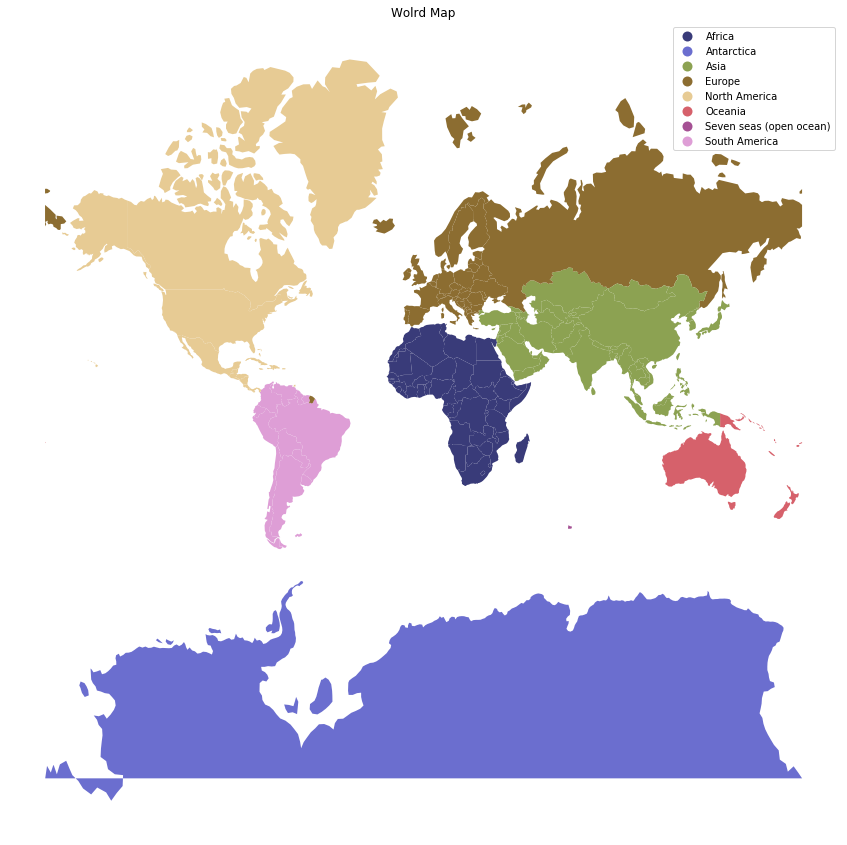

In [13]:
import matplotlib.pyplot as plt

ax = countries_mercator.plot(
    figsize=(15, 15), column='continent', cmap="tab20b", legend=True, categorical=True)
ax.set_title("Wolrd Map")
ax.set_axis_off()
plt.show()